In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
%ls -ltrh /Users/laurentperrinet/quantic/grants/Polychronies/RSG-spikepatterns/Data/

total 2319280
-rw-r--r--  1 laurentperrinet  staff   211M Jun 14 10:42 H_Ready-Set_bin1ms_alignedReady.mat
-rw-r--r--  1 laurentperrinet  staff   407M Jun 14 10:55 G_Ready-Set_bin1ms_alignedReady.mat
-rw-r--r--@ 1 laurentperrinet  staff   2.0K Jun 15 12:29 README.md
-rw-r--r--@ 1 laurentperrinet  staff   183M Jun 27 15:52 G_Ready-Set_bin1ms_alignedReady_session=0.npz
-rw-r--r--@ 1 laurentperrinet  staff   212M Jun 27 15:52 G_Ready-Set_bin1ms_alignedReady_session=1.npz
-rw-r--r--@ 1 laurentperrinet  staff    17M Jun 27 15:52 H_Ready-Set_bin1ms_alignedReady_session=0.npz
-rw-r--r--@ 1 laurentperrinet  staff    68M Jun 27 15:52 H_Ready-Set_bin1ms_alignedReady_session=1.npz


In [3]:
# i_session = 0
# monkey = 'G'
# path = Path.home()/'quantic'/'grants'/'polychronies'/'RSG-spikepatterns'/'Data'/f'{monkey}_Ready-Set_bin1ms_alignedReady_session={i_session}.npy'
# data = np.load(path)
# N_time, N_neurons, N_trial = data.shape
# N_time, N_neurons, N_trial

In [4]:
i_session = 0
monkey = 'G'
path = Path.home()/'quantic'/'grants'/'polychronies'/'RSG-spikepatterns'/'Data'/f'{monkey}_Ready-Set_bin1ms_alignedReady_session={i_session}.npz'

dictdata = np.load(path)


In [5]:
data, id_neuron, id_short, t_s, t_p = dictdata['data'], dictdata['id_neuron'], dictdata['id_short'], dictdata['t_s'], dictdata['t_p']


transferring back the 255 into NaNs

In [20]:
data = data.astype(float)

In [21]:
data[data==255] = np.nan

In [23]:
N_time, N_neurons, N_trial = data.shape
N_time, N_neurons, N_trial

(1200, 107, 1498)

## displaying some raster plots

In [25]:
print(i_session, np.mean(np.nanmean(data, axis=(0, 1))*1000), np.std(np.nanmean(data, axis=(0, 1))*1000))

0 2.839377737294586 0.8299818088877707


In [26]:
i_trial = 0
data_trimT = data[np.isnan(data[:, :, i_trial]).sum(axis=1)<N_neurons, :, i_trial]
data_trimT.shape

(1200, 107)

In [27]:
data_trim = data_trimT[:, np.isnan(data_trimT).sum(axis=0)==0]
data_trim.shape

(1200, 107)

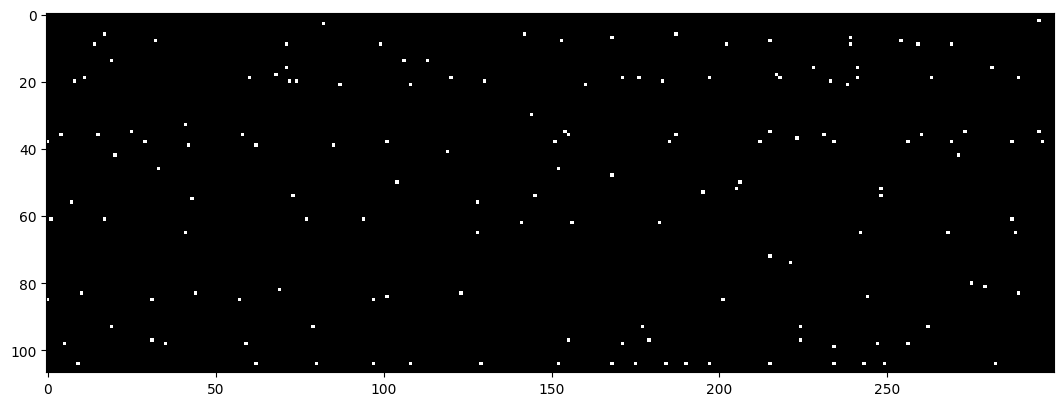

In [28]:
fig, ax = plt.subplots(figsize=(13, 8))
ax.imshow((data_trim>0)[:300, :].T, cmap='gray');

### checking we have the good t_s on each trial

In [29]:
for i_trial in range(N_trial):
    print('ts=', (np.isnan(data[:, :, i_trial]).sum(axis=1)<N_neurons).sum())
    if i_trial>10: break


ts= 1200
ts= 1200
ts= 1200
ts= 1200
ts= 1200
ts= 1200
ts= 1200
ts= 1200
ts= 1200
ts= 1200
ts= 1200
ts= 1200


In [30]:
active_neurons = np.isnan(data_trimT).sum(axis=0)==0
active_neurons

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

### computing some firing rates

In [31]:
DeltaT = 100 # number of time bins on which we average
dt = 40 # points on which we comute the 

In [32]:
data


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.